In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm
from training_data import CombinedData
from PIL import Image
from matplotlib import pyplot as plt

data_train = CombinedData('HASY')
data_test = CombinedData('HASY', train=False)

print("Train data length: {0}".format(len(data_train.data)))
print("Test data length: {0}".format(len(data_test.data)))
print("Img Shape: {0}".format(data_train.data[0].shape))
print("Number of Labels: {0}".format(data_train.no_labels))

  8%|▊         | 834/10000 [00:00<00:01, 8338.85it/s]

No training data for 0. Skipping
No training data for 1. Skipping
No training data for 2. Skipping
No training data for 3. Skipping
No training data for 4. Skipping
No training data for 5. Skipping
No training data for 6. Skipping
No training data for 7. Skipping
No training data for 8. Skipping
No training data for 9. Skipping
No training data for +. Skipping


100%|██████████| 10000/10000 [00:00<00:00, 356294.94it/s]

No training data for 0. Skipping
No training data for 1. Skipping
No training data for 2. Skipping
No training data for 3. Skipping
No training data for 4. Skipping
No training data for 5. Skipping
No training data for 6. Skipping
No training data for 7. Skipping
No training data for 8. Skipping
No training data for 9. Skipping
No training data for +. Skipping
Train data length: 60405
Test data length: 10045
Img Shape: torch.Size([1, 32, 32])
Number of Labels: 11


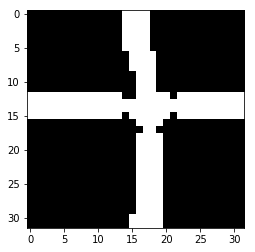

Label: 10


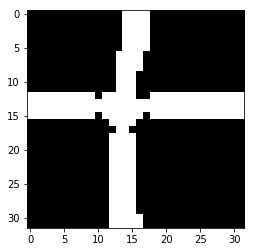

Label: 10


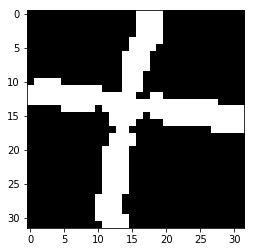

Label: 10


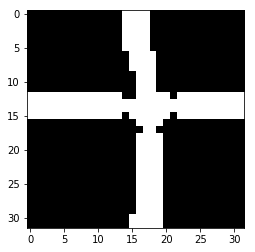

Label: 10


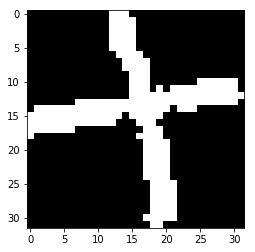

Label: 10


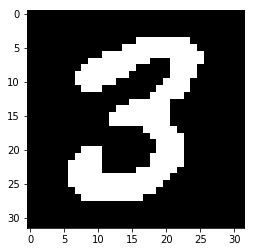

Label: 3


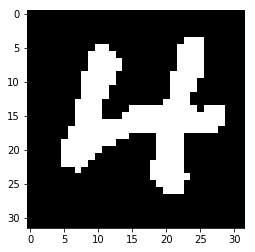

Label: 4


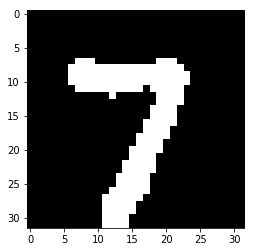

Label: 7


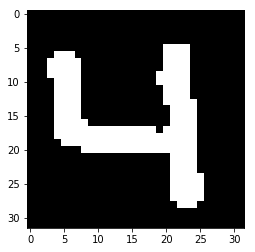

Label: 4


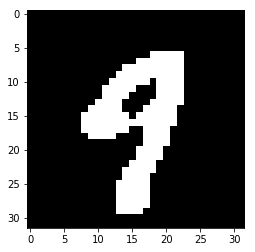

Label: 9


In [2]:
from torchvision import transforms
for i in range(5):
    test_img = transforms.ToPILImage()(data_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()
    print("Label:", data_train.targets[i])
for i in range(7000, 7005):
    test_img = transforms.ToPILImage()(data_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()
    print("Label:", data_train.targets[i])

In [3]:
# Train with a pretrained model from PyTorch
from torchvision import models
from torch.nn import Conv2d

pretrained = False
torch_model = models.alexnet(num_classes=15)
torch_model.features[0] = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
if pretrained:
    torch_model.load_state_dict(torch.load('pretrained-model-01.ckpt'))
epochs = 5
optimizer = torch.optim.Adam(torch_model.parameters(), lr=0.001, betas=(0.95, 0.95), weight_decay=0)
criterion = nn.CrossEntropyLoss()

def calc_accuracy(model):
    accuracies = []
    for idx, [x_test, y_test] in enumerate(tqdm(test_loader)):
        test_pred = model(x_test)
        accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
        accuracies.append(accuracy)
    return np.mean(accuracies)  

train_loader = DataLoader(data_train, batch_size=16, shuffle=True)
test_loader = DataLoader(data_test, batch_size=16, shuffle=False)

print(torch_model)


AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3):

In [ ]:
for epoch in range(epochs):
    print("Epoch {0}".format(epoch))
    acc = calc_accuracy(torch_model)
    print("Accuracy: {0}".format(acc))
    if acc > 80:
        torch.save(torch_model.state_dict(), 'combined-model-{0}.ckpt'.format(acc))
    for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
        optimizer.zero_grad()
        train_pred = torch_model(x_train)
        loss = criterion(train_pred, y_train)
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print('Loss: {}'.format(loss))
acc = calc_accuracy(torch_model)
print("Accuracy: {0}".format(acc))
torch.save(torch_model.state_dict(), 'combined-model-v3.ckpt')

Epoch 0


  0%|          | 0/3776 [00:00<?, ?it/s]

Accuracy: 9.737874031066895


  0%|          | 1/3776 [00:00<48:51,  1.29it/s]

Loss: 2.7063674926757812


  3%|▎         | 101/3776 [01:00<40:50,  1.50it/s]

Loss: 2.174452066421509


  5%|▌         | 201/3776 [02:04<43:48,  1.36it/s]

Loss: 1.5273975133895874


  8%|▊         | 301/3776 [03:06<30:24,  1.90it/s]

Loss: 1.191205382347107


 11%|█         | 401/3776 [04:02<35:03,  1.60it/s]

Loss: 0.38297638297080994


 13%|█▎        | 501/3776 [04:56<35:51,  1.52it/s]

Loss: 0.45592033863067627


 16%|█▌        | 601/3776 [05:58<26:32,  1.99it/s]

Loss: 0.47819116711616516


 19%|█▊        | 701/3776 [06:49<25:24,  2.02it/s]

Loss: 0.6159712672233582


 21%|██        | 801/3776 [07:43<32:36,  1.52it/s]

Loss: 0.4763588309288025


 24%|██▍       | 901/3776 [09:04<40:32,  1.18it/s]

Loss: 0.09862426668405533


 27%|██▋       | 1001/3776 [10:29<38:46,  1.19it/s]

Loss: 0.2288282960653305


 29%|██▉       | 1101/3776 [11:54<39:38,  1.12it/s]

Loss: 0.008923925459384918


 32%|███▏      | 1201/3776 [13:28<42:48,  1.00it/s]

Loss: 0.23555585741996765


 32%|███▏      | 1221/3776 [13:48<44:31,  1.05s/it]

In [ ]:
acc = calc_accuracy(torch_model)
print("Accuracy: {0}".format(acc))
torch.save(torch_model.state_dict(), 'combined-model-v3.ckpt')